**This is the same as "Linear Regression - relationship plots", but using "raw" data provided by Jesse on 13/08/2015**

In [28]:
import pandas as pd
import numpy as np

%matplotlib inline

### Read in the data

In [29]:
census_colname = 'ONS_Census_2011'
TARGET_COLNAME = 'Presented_Normalised'
target_colname = 'tempPresHS2014_1624'
#arget_colname = '{0}'.format(TARGET_COLNAME)
population_colname = 'pop_2014_1624'
population_total_colname = 'total_pop_2014'

In [30]:
DATA_RAW = pd.read_csv('../source data/new data/dataset for ADAM 13 Aug 2015.csv')
mask = ((DATA_RAW[census_colname].str[0] == 'E') + (DATA_RAW[census_colname].str[0] == 'W'))
DATA_ENG_WAL_RAW = DATA_RAW[mask]
DATA_ENG_WAL = DATA_ENG_WAL_RAW[DATA_ENG_WAL_RAW[census_colname].notnull()]

# "test" subset — all records with known ONS codes
data_eng = DATA_ENG_WAL.copy()
#kick out the outlier: Milton Keynes
data_eng = data_eng[data_eng[census_colname] != 'E06000042']

/home/adam/anaconda3/lib/python3.4/site-packages/pandas/computation/expressions.py:190: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  unsupported[op_str]))


Use young population as a predictor, not the total population:

In [31]:
#YOUNG_POPULATION = pd.read_csv('../source data/new data/young_populations.csv')
#data_eng = data_eng.merge(YOUNG_POPULATION, how='left', on=census_colname)

### Tidy up

I don't like punctuation in column names. Also they shouldn't start with a number

In [32]:
to_replace = (':', '/', ';', ',', '(', ')')

for col in data_eng.columns:
    if col not in [population_colname, census_colname]:
        newname = col
        if newname[0].isdigit():
            newname = 'p_{0}'.format(newname)
        newname = newname.replace(' ', '_')
        for item in to_replace:
            newname = newname.replace(item, '')

        data_eng = data_eng.rename(columns={col: newname})

#I don't like this very long variable name, I'll rename it:
#data_eng = data_eng.rename(columns={'All_persons_Highest_Level_of_Qualification_All_categories_Highest_level_of_qualification_measures_Value_Total': 'edu_highest'})

In [33]:
#For printing all columns:
data_eng.columns

Index(['ONS_Census_2011', 'Local_Authority', 'total_pop_2014', 'region_code', 'region_name', 'stat_16to24_2014', 'stat_allage_2014', 'pop_2014_1624', 'PandR2014_1624', 'PandR_allage_2014', 'tempPresHS2014_1624', 'tempAssHS2014_1624', 'tempAccHS2014_1624'], dtype='object')

Define relevant columns (done by hand):

In [34]:
target_columns = [TARGET_COLNAME]
other_columns = ['stat_16to24_2014', 'stat_allage_2014', 'PandR2014_1624', 'PandR_allage_2014', 'tempAssHS2014_1624', 'tempAccHS2014_1624']
#unempl_columns = ['unemployed_age_16_and_over', 'unemployment_age_16_to_24', 'unemployment_age_25_to_34', 'never_worked_age_16_and_over', 'never_worked_age_16_to_24', 'never_worked_age_25_to_34']
#ethno_columns = ['All_categories_Ethnic_group_of_HRP', 'White_Total', 'White_EnglishWelshScottishNorthern_IrishBritish', 'White_Irish', 'White_Gypsy_or_Irish_Traveller', 'White_Other_White', 'Mixedmultiple_ethnic_group_Total', 'Mixedmultiple_ethnic_group_White_and_Black_Caribbean', 'Mixedmultiple_ethnic_group_White_and_Black_African', 'Mixedmultiple_ethnic_group_White_and_Asian', 'Mixedmultiple_ethnic_group_Other_Mixed', 'AsianAsian_British_Total', 'AsianAsian_British_Indian', 'AsianAsian_British_Pakistani', 'AsianAsian_British_Bangladeshi', 'AsianAsian_British_Chinese', 'AsianAsian_British_Other_Asian', 'BlackAfricanCaribbeanBlack_British_Total', 'BlackAfricanCaribbeanBlack_British_African', 'BlackAfricanCaribbeanBlack_British_Caribbean', 'BlackAfricanCaribbeanBlack_British_Other_Black', 'Other_ethnic_group_Total', 'Other_ethnic_group_Arab', 'Other_ethnic_group_Any_other_ethnic_group']
#edu_columns = ['edu_highest', '_All_persons_Highest_Level_of_Qualification_No_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_1_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Level_2_qualifications_measures_Value', 'All_persons_Highest_Level_of_Qualification_Apprenticeship_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_3_qualifications_measures_Value', '_All_persons_Highest_Level_of_Qualification_Level_4_qualifications_and_above_measures_Value', '_All_persons_Highest_Level_of_Qualification_Other_qualifications_measures_Value']

All analysis should be done on normalised data, e.g. numbers divided by populations.

In [35]:
columns_to_normalise = other_columns
columns_to_normalise_young = ['stat_16to24_2014', 'PandR2014_1624', 'tempAssHS2014_1624', 'tempAccHS2014_1624']
columns_all = [x for x in columns_to_normalise if x not in columns_to_normalise_young]
for column in columns_all:
    data_eng[column] = data_eng[column]/data_eng[population_total_colname]
for column in columns_to_normalise_young:
    data_eng[column] = data_eng[column]/data_eng[population_colname]
    
data_eng['Presented_Normalised'] = data_eng[target_colname]/data_eng[population_colname]

In [36]:
data_eng.head(5)

,ONS_Census_2011,Local_Authority,total_pop_2014,region_code,region_name,stat_16to24_2014,stat_allage_2014,pop_2014_1624,PandR2014_1624,PandR_allage_2014,tempPresHS2014_1624,tempAssHS2014_1624,tempAccHS2014_1624,Presented_Normalised
0,E08000025,Birmingham,1101360,E12000005,West Midlands,0.000904,0.002851,164324,NaN,0.008264,1195,0.007272,0.004576,0.007272
1,E07000138,Lincoln,96202,E12000004,East Midlands,0.002577,0.002609,18629,NaN,0.008357,353,0.018949,0.013903,0.018949
2,E09000028,Southwark,302538,E12000007,London,0.000896,0.002833,38483,NaN,0.006254,NaN,NaN,0.004651,NaN
3,E08000028,Sandwell,316719,E12000005,West Midlands,0.000274,0.001784,36430,NaN,0.005497,1307,0.005325,0.003953,0.035877
4,E07000081,Gloucester,125649,E12000009,South West,0.001298,0.001441,14257,0.010591,0.004107,288,NaN,0.009609,0.020201


### P1E data

Read them in and merge with the rest.

In [37]:
p1e = pd.read_csv('../source data/new data/p1e.csv')

p1e_columns = []
for year in (2012, 2013, 2014):
    for i in range(4):
        p1e_columns.append('p_{0}_{1}'.format(year, i+1))
        p1e_columns.append('p_{0}_{1}_all'.format(year, i+1))
        
p1e_columns = p1e_columns[2:]

data_eng = data_eng.merge(p1e[[census_colname] + p1e_columns], on=census_colname, how='left')

#don't normalise for now
#for column in p1e_columns:
#    data_eng[column] = data_eng[column]/data_eng[population_total_colname]

How many LAs have P1E data for the whole 2014?

In [38]:
print(len(p1e.dropna(subset=['p_2014_1_all', 'p_2014_2_all', 'p_2014_3_all', 'p_2014_4_all'], how='any')))
print(len(p1e.dropna(subset=['p_2014_3_all'], how='any')))

260
297


### Shelter data

If you want, you can import data from Shelter folder. You can then add them to predictor variables with:
```python
for col in to_join:
    predictors.append(to_join[col][1])
```

In [39]:
test = data_eng.copy()

# the structure of this dictionary is as follows: {filename: [[column_name_in_csv], desired_column_name]}
to_join = {'Average weekly council rents': [['13/14'], 'avg_council_rents'],
           'Council homes sold through Right To Buy': [['13/14'], 'right_to_buy'],
           'Housing Benefit claimants - all': [['housing_benefit'], 'housing_benefit']}

for metric in to_join:
    temp = pd.read_csv('../source data/new data/Shelter_Data/{0}.csv'.format(metric))
    temp = temp[['ONS'] + to_join[metric][0]].dropna().rename(columns={'ONS': census_colname})
    test = test.merge(temp, how='left', on = census_colname)
    
    rename_cols = {to_join[metric][0][0]: to_join[metric][1]}
    test = test.rename(columns=rename_cols)

#which columns should be normalised?
columns_to_normalise_new = ['right_to_buy', 'housing_benefit']
for column in columns_to_normalise_new:
    test[column] = test[column].astype(float)/test[population_total_colname]

In [40]:
print('Number of LAs with "presented" known:', len(test.dropna(subset=[TARGET_COLNAME])))
print('\nShelter data are full of holes. These are numbers of LAs with respective Shelter columns defined:')
for col in to_join:
    print(len(test.dropna(subset=[to_join[col][1], TARGET_COLNAME])), '\t', col)

Number of LAs with "presented" known: 162

Shelter data are full of holes. These are numbers of LAs with respective Shelter columns defined:
70 	 Average weekly council rents
148 	 Housing Benefit claimants - all
77 	 Council homes sold through Right To Buy


So we can add "Housing Benefit claimants" from Shelter.
Define predictors:

In [41]:
predictors = other_columns
# only using one column from p1e data (total homeless from 2014.3), the rest is patchy
predictors.append('p_2014_3_all')
#predictors.append('IMD_SCORE')
predictors.append('housing_benefit')
#for col in to_join:
#    predictors.append(to_join[col][1])
    
pd.set_option('display.max_columns', None) # show all columns

# make a subset where all predictors and "presented" (target) != NaN
test_filled = test.dropna(subset=predictors, how='any')

Add the "training" subset, i.e. where we know "presented" numbers.

In [42]:
train_filled = test_filled.dropna(subset=[target_colname])

Explore cross-correlations:

In [43]:
train_filled[predictors].corr()

,stat_16to24_2014,stat_allage_2014,PandR2014_1624,PandR_allage_2014,tempAssHS2014_1624,tempAccHS2014_1624,p_2014_3_all,housing_benefit
stat_16to24_2014,1.000000,0.744270,-0.083917,-0.128719,0.540096,0.786391,0.463613,0.215442
stat_allage_2014,0.744270,1.000000,-0.089418,-0.162279,0.696884,0.874832,0.732847,0.410816
PandR2014_1624,-0.083917,-0.089418,1.000000,0.439089,0.084458,-0.083975,-0.070565,0.226094
PandR_allage_2014,-0.128719,-0.162279,0.439089,1.000000,-0.064952,-0.146886,-0.133807,0.155688
tempAssHS2014_1624,0.540096,0.696884,0.084458,-0.064952,1.000000,0.756594,0.447041,0.384536
tempAccHS2014_1624,0.786391,0.874832,-0.083975,-0.146886,0.756594,1.000000,0.469255,0.253810
p_2014_3_all,0.463613,0.732847,-0.070565,-0.133807,0.447041,0.469255,1.000000,0.609595
housing_benefit,0.215442,0.410816,0.226094,0.155688,0.384536,0.253810,0.609595,1.000000


Specifically, let's see correlation with the target variable:

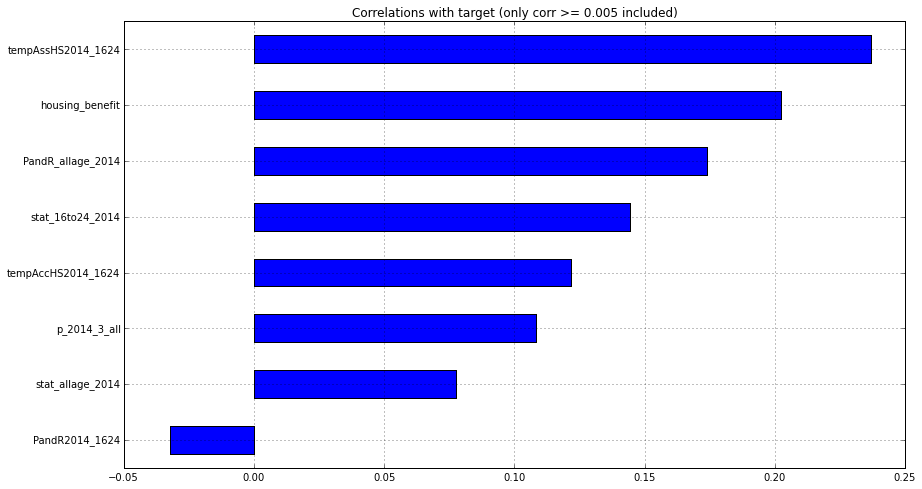

In [45]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14, 8)
correlation_with_target = train_filled[predictors + [TARGET_COLNAME]].corr()[TARGET_COLNAME].order()
correlation_with_target[:-1].plot(kind='barh', title='Correlations with target (only corr >= 0.005 included)')

### Individual relationships

In [46]:
from sklearn import linear_model
clf_ind = linear_model.LinearRegression()
plt.rcParams['figure.figsize'] = (10, 8)

#### Young population

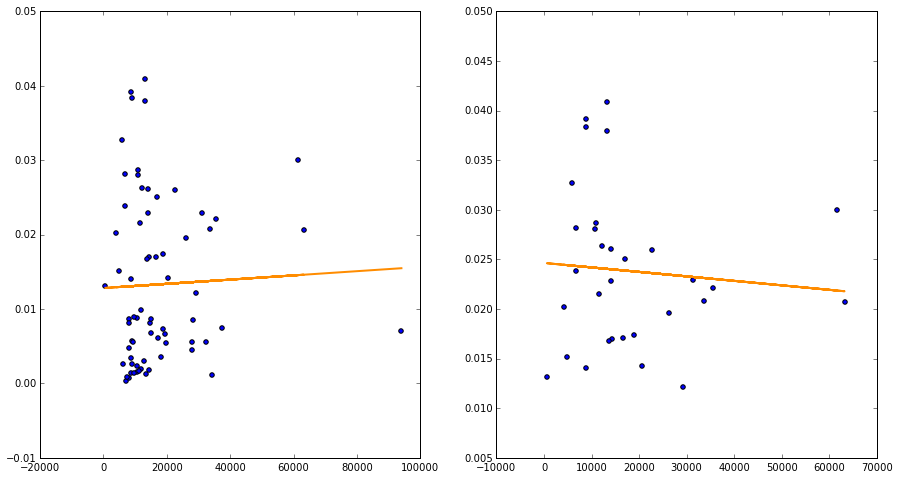

In [47]:
target_colname=TARGET_COLNAME
plt.rcParams['figure.figsize'] = (15, 8)

predictor = population_colname
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

###P1E

/home/adam/anaconda3/lib/python3.4/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


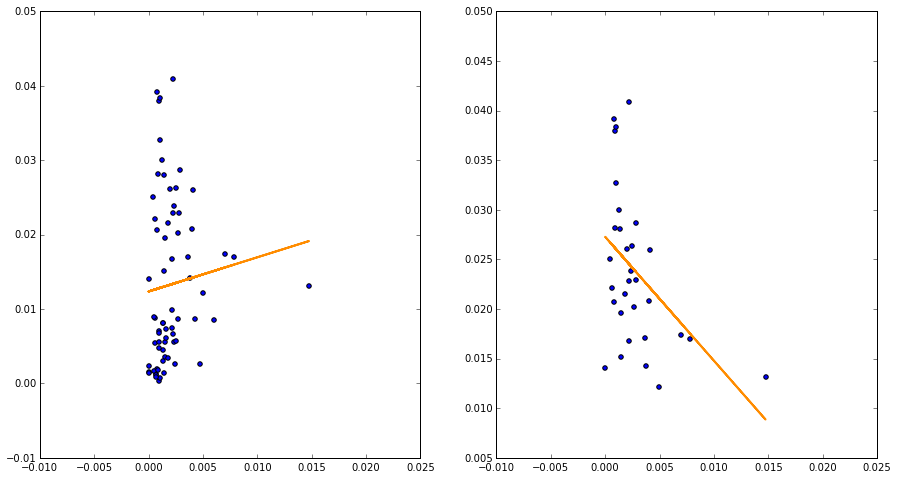

In [49]:
train_filled['p2014_normalised'] = train_filled['p_2014_3_all']/train_filled[population_colname]
predictor = 'p2014_normalised'

clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

### Statutory 16-24

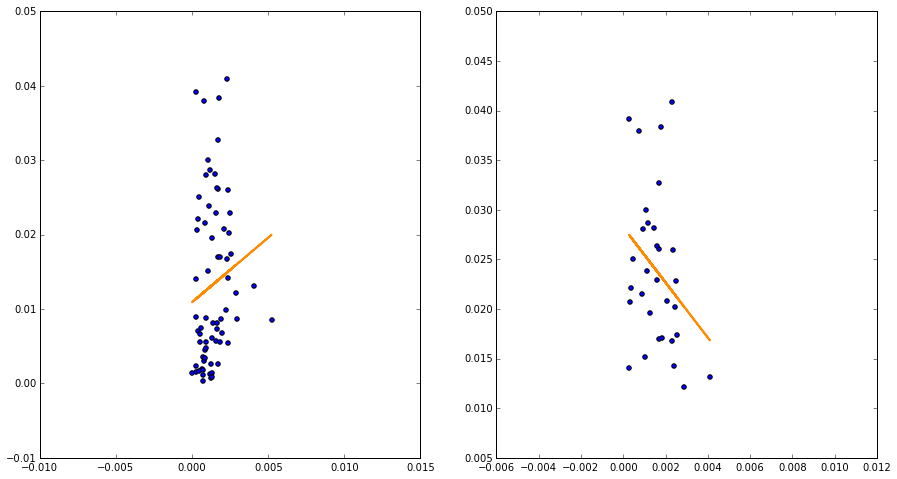

In [52]:
plt.rcParams['figure.figsize'] = (15, 8)

predictor = 'stat_16to24_2014'
target_colname = 'Presented_Normalised'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

#### Prevention and relief

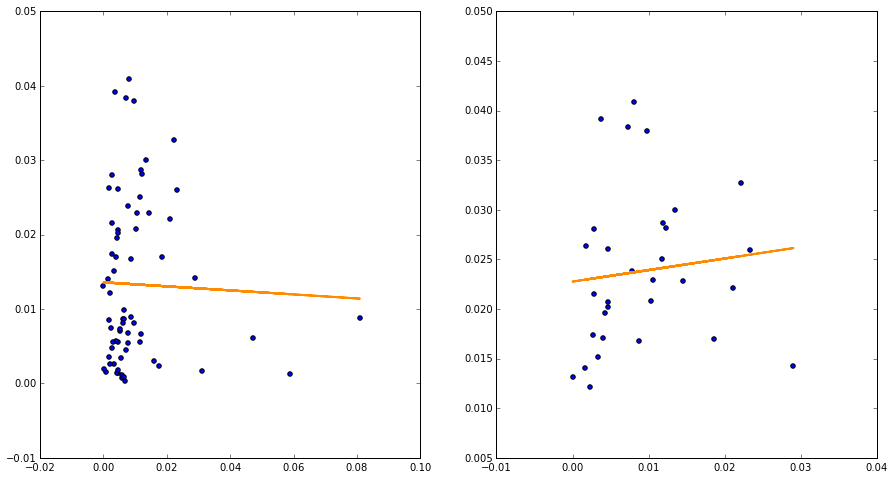

In [53]:
predictor = 'PandR2014_1624'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

#### Assessed

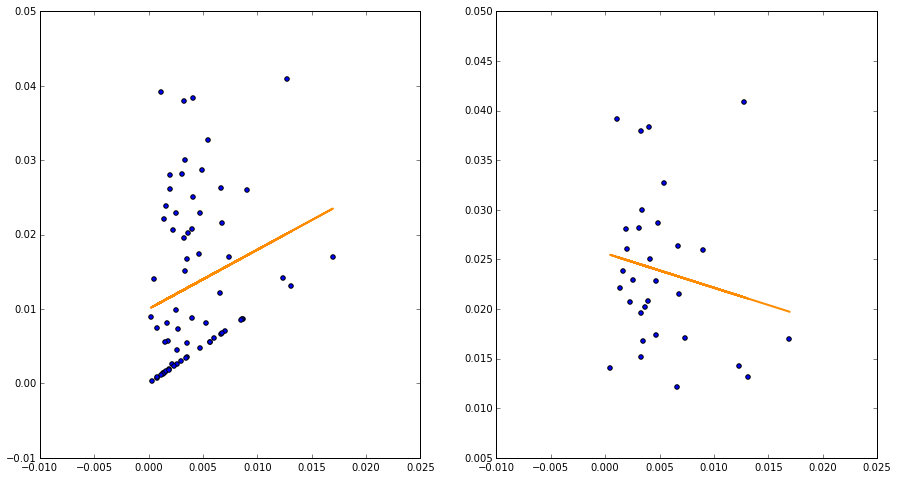

In [56]:
predictor = 'tempAssHS2014_1624'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

(the points at the bottom that seem to follow a trend are LAs where presented=assessed)

#### Accepted

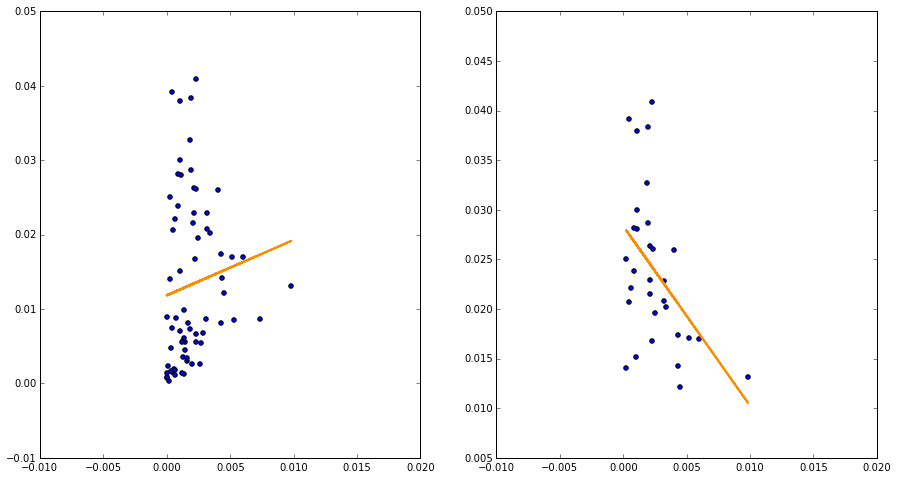

In [57]:
predictor = 'tempAccHS2014_1624'
clf_ind.fit(train_filled[[predictor]], train_filled[target_colname])
prediction = clf_ind.predict(train_filled[[predictor]])

fig = plt.figure()
ax = fig.add_subplot(121)
ax.scatter(train_filled[predictor], train_filled[target_colname])
ax.plot(train_filled[predictor], prediction, color='darkorange', lw=2)

mask = train_filled['Presented_Normalised'] > 0.01
clf_ind.fit(train_filled[mask][[predictor]], train_filled[mask][target_colname])
prediction = clf_ind.predict(train_filled[mask][[predictor]])
ax2 = fig.add_subplot(122)
ax2.scatter(train_filled[mask][predictor], train_filled[mask][target_colname])
ax2.plot(train_filled[mask][predictor], prediction, color='darkorange', lw=2)

### Linear Model

#### All data

In [58]:
picked_predictors = other_columns

In [59]:
import statsmodels.formula.api as sm
model1 = sm.ols(formula="{0} ~ {1}".format(TARGET_COLNAME, ' + '.join(picked_predictors)), data=train_filled).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Presented_Normalised   R-squared:                       0.174
Model:                              OLS   Adj. R-squared:                  0.064
Method:                   Least Squares   F-statistic:                     1.582
Date:                  Sat, 15 Aug 2015   Prob (F-statistic):              0.149
Time:                          09:53:41   Log-Likelihood:                 219.54
No. Observations:                    69   AIC:                            -421.1
Df Residuals:                        60   BIC:                            -401.0
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0023      0.005      0.467      0.642        -0.008     0.012
stat_16to24_2014       2.5801      2.361      1.093      0.279        -2.142     7.303
stat_allage_2014      -7.9351      5.985     -1.326      0.190       -19.908     4.038
PandR2014_1624        -0.1819      0.115     -1.581      0.119        -0.412     0.048
PandR_allage_2014      1.2095      0.686      1.764      0.083        -0.162     2.581
tempAssHS2014_1624     1.2162      0.650      1.872      0.066        -0.083     2.516
tempAccHS2014_1624     0.1972      2.113      0.093      0.926        -4.029     4.423
p_2014_3_all        3.373e-05    6.8e-05      0.496      0.622        -0.000     0.000
housing_benefit        0.0732      0.079      0.926      0.358        -0.085     0.231
==============================================================================
Omnibus:                        6.072   Durbin-Watson:                   2.120
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                6.182
Skew:                           0.723   Prob(JB):                       0.0455
Kurtosis:                       2.759   Cond. No.                     2.42e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### "Reliable" data

(take only those authorities for which the franction of presented is > 0.01)

In [60]:
mask = train_filled['Presented_Normalised'] > 0.01
import statsmodels.formula.api as sm
model2 = sm.ols(formula="{0} ~ {1}".format(TARGET_COLNAME, ' + '.join(picked_predictors)), data=train_filled[mask]).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Presented_Normalised   R-squared:                       0.461
Model:                              OLS   Adj. R-squared:                  0.265
Method:                   Least Squares   F-statistic:                     2.353
Date:                  Sat, 15 Aug 2015   Prob (F-statistic):             0.0536
Time:                          09:54:05   Log-Likelihood:                 116.06
No. Observations:                    31   AIC:                            -214.1
Df Residuals:                        22   BIC:                            -201.2
Df Model:                             8                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept              0.0161      0.006      2.798      0.010         0.004     0.028
stat_16to24_2014       3.7925      2.903      1.307      0.205        -2.228     9.813
stat_allage_2014      -5.2136      5.440     -0.958      0.348       -16.495     6.068
PandR2014_1624         0.0901      0.209      0.431      0.671        -0.344     0.524
PandR_allage_2014     -0.3637      0.676     -0.538      0.596        -1.766     1.039
tempAssHS2014_1624     0.4585      0.603      0.760      0.455        -0.793     1.710
tempAccHS2014_1624    -1.5308      2.207     -0.694      0.495        -6.108     3.046
p_2014_3_all       -9.583e-05   6.55e-05     -1.463      0.158        -0.000     4e-05
housing_benefit        0.1747      0.092      1.895      0.071        -0.016     0.366
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   1.834
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.299
Skew:                           0.139   Prob(JB):                        0.861
Kurtosis:                       2.607   Cond. No.                     2.81e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.81e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Conclusion

As you can see from the plots, none of the variables are correlated.